# Use built-in functions and GROUP BY in Transact-SQL

Learn how to use functions in Transact-SQL, and how to group aggregated results.

## Learning objectives

After completing this module, you will be able to:

- Categorize built-in functions
- Use scalar functions
- Use ranking and rowset functions
- Use aggregate functions
- Summarize data with GROUP BY
- Filter groups with HAVING

# Introduction

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span>

- When retrieving data from tables in a database, it's often useful to be able to manipulate data values by using _functions_; to format, convert, aggregate, or otherwise affect the output from the query. Additionally, when aggregating data, you'll often want to _group_ the results and show aggregations for each group - for example, to see total values by category. In this module, you'll learn how to:
- Categorize built-in functions
- Use scalar functions
- Use ranking and rowset functions
- Use aggregate functions
- Summarize data with the GROUP BY clause
- Filter groups with the HAVING clause

# Categorize built-in functions

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span>

Transact-SQL includes many built-in functions, ranging from functions that perform data type conversion, to functions that aggregate and analyze groups of rows.

Functions in T-SQL can be categorized as follows:

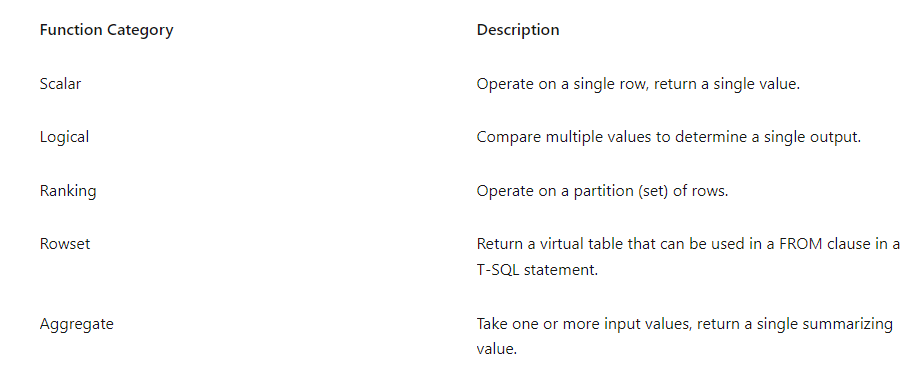

# Use scalar functions

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span>

Scalar functions return a single value and usually work on a single row of data. The number of input values they take can be zero (for example, GETDATE), one (for example, UPPER), or multiple (for example, ROUND). Because scalar functions always return a single value, they can be used anywhere a single value (the result) is needed. They are most commonly used in SELECT clauses and WHERE clause predicates. They can also be used in the SET clause of an UPDATE statement.

Built-in scalar functions can be organized into many categories, such as string, conversion, logical, mathematical, and others. This module will look at a few common scalar functions.

Some considerations when using scalar functions include:

- Determinism: If the function returns the same value for the same input and database state each time it is called, we say it is _deterministic_. For example, ROUND(1.1, 0) always returns the value 1.0. Many built-in functions are _nondeterministic_. For example, GETDATE() returns the current date and time. Results from nondeterministic functions cannot be indexed, which affects the query processor's ability to come up with a good plan for executing the query.
- Collation: When using functions that manipulate character data, which collation will be used? Some functions use the collation (sort order) of the input value; others use the collation of the database if no input collation is supplied.

## Scalar function examples

At the time of writing, the SQL Server Technical Documentation listed more than 200 scalar functions that span multiple categories, including:

- Configuration functions
- Conversion functions
- Cursor functions
- Date and Time functions
- Mathematical functions
- Metadata functions
- Security functions
- String functions
- System functions
- System Statistical functions
- Text and Image functions

There isn't enough time in this course to describe each function, but the examples below show some commonly used functions.

The following hypothetical example uses several date and time functions:

SQLCopy

```
SELECT  SalesOrderID,
    OrderDate,
        YEAR(OrderDate) AS OrderYear,
        DATENAME(mm, OrderDate) AS OrderMonth,
        DAY(OrderDate) AS OrderDay,
        DATENAME(dw, OrderDate) AS OrderWeekDay,
        DATEDIFF(yy,OrderDate, GETDATE()) AS YearsSinceOrder
FROM Sales.SalesOrderHeader;

```

The next example includes some mathematical functions:

```
SELECT TaxAmt,
       ROUND(TaxAmt, 0) AS Rounded,
       FLOOR(TaxAmt) AS Floor,
       CEILING(TaxAmt) AS Ceiling,
       SQUARE(TaxAmt) AS Squared,
       SQRT(TaxAmt) AS Root,
       LOG(TaxAmt) AS Log,
       TaxAmt * RAND() AS Randomized
FROM Sales.SalesOrderHeader;

```

The following example uses some string functions:

```
SELECT  CompanyName,
        UPPER(CompanyName) AS UpperCase,
        LOWER(CompanyName) AS LowerCase,
        LEN(CompanyName) AS Length,
        REVERSE(CompanyName) AS Reversed,
        CHARINDEX(' ', CompanyName) AS FirstSpace,
        LEFT(CompanyName, CHARINDEX(' ', CompanyName)) AS FirstWord,
        SUBSTRING(CompanyName, CHARINDEX(' ', CompanyName) + 1, LEN(CompanyName)) AS RestOfName
FROM Sales.Customer;
```

## Logical functions

Another category of functions allows determine which of several values is to be returned. Logical functions evaluate an input expression, and return an appropriate value based on the result.

### IIF

The IIF function evaluates a Boolean input expression, and returns a specified value if the expression evaluates to True, and an alternative value if the expression evaluates to False.

For example, consider the following query, which evaluates the address type of a customer. If the value is "Main Office", the expression returns "Billing". For all other address type values, the expression returns "Mailing".

SQLCopy

```
SELECT AddressType,
      IIF(AddressType = 'Main Office', 'Billing', 'Mailing') AS UseAddressFor
FROM Sales.CustomerAddress;
```

### CHOOSE

The CHOOSE function evaluates an integer expression, and returns the corresponding value from a list based on its (1-based) ordinal position.

SQLCopy

```
SELECT SalesOrderID, Status,
CHOOSE(Status, 'Ordered', 'Shipped', 'Delivered') AS OrderStatus
FROM Sales.SalesOrderHeader;
```

# Use ranking and rowset functions

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span><span class="xp-tag-xp" style="box-sizing: inherit; outline-color: inherit; color: var(--theme-success-invert); margin-bottom: 1px; font-size: 12px;">100 XP</span>

- 3 minutes

Ranking and rowset functions aren't scalar functions because they don't return a single value. These functions work accept a set of rows as input and return a set of rows as output.

## Ranking functions

Ranking functions allow you to perform calculations against a user-defined set of rows. These functions include ranking, offset, aggregate, and distribution functions.

This example uses the RANK function to calculate a ranking based on the ListPrice, with the highest price ranked at 1:

SQLCopy

```
SELECT TOP 100 ProductID, Name, ListPrice,
RANK() OVER(ORDER BY ListPrice DESC) AS RankByPrice
FROM Production.Product AS p
ORDER BY RankByPrice;
```

### OVER

You can use the OVER clause to define partitions, or groupings within the data. For example, the following query extends the previous example to calculate price-based rankings for products within each category.

SQLCopy

```
SELECT c.Name AS Category, p.Name AS Product, ListPrice,
  RANK() OVER(PARTITION BY c.Name ORDER BY ListPrice DESC) AS RankByPrice
FROM Production.Product AS p
JOIN Production.ProductCategory AS c
ON p.ProductCategoryID = c.ProductcategoryID
ORDER BY Category, RankByPrice;
```

 Note

Notice that several rows have the same rank value and some values are skipped. This is because we are using RANK only. Depending on the requirement, you may want to avoid ties at the same rank value. You can control the rank value with other functions, DENSE\_RANK, NTILE, and ROW\_NUMBER, as needed. For details on these functions, see the [Transact-SQL reference documentation](https://learn.microsoft.com/en-us/sql/t-sql/functions/ranking-functions-transact-sql).

## Rowset functions

Rowset functions return a virtual table that can be used in the FROM clause as a data source. These functions take parameters specific to the rowset function itself. They include OPENDATASOURCE, OPENQUERY, OPENROWSET, OPENXML, and OPENJSON.

The OPENDATASOURCE, OPENQUERY, and OPENROWSET functions enable you to pass a query to a remote database server. The remote server will then return a set of result rows. For example, the following query uses OPENROWSET to get the results of a query from a SQL Server instance named SalesDB.

SQLCopy

```
SELECT a.*
FROM OPENROWSET('SQLNCLI', 'Server=SalesDB;Trusted_Connection=yes;',
    'SELECT Name, ListPrice
    FROM AdventureWorks.Production.Product') AS a;

```

To use remote servers, you must enable some advanced options in the SQL Server instance where you're running the query.

The OPENXML and OPENJSON functions enable you to query structured data in XML or JSON format and extract values into a tabular rowset.

A detailed exploration of rowset functions is beyond the scope of this module. For more information, see the [Transact-SQL reference documentation](https://learn.microsoft.com/en-us/sql/t-sql/functions/functions).

# Use aggregate functions

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span>

T-SQL provides aggregate functions such as SUM, MAX, and AVG to perform calculations that take multiple values and return a single result.

## Working with aggregate functions

Most of the queries we have looked at operate on a row at a time, using a WHERE clause to filter rows. Each row returned corresponds to one row in the original data set.

Many aggregate functions are provided in SQL Server. In this section, we’ll look at the most common functions such as SUM, MIN, MAX, AVG, and COUNT.

When working with aggregate functions, you need to consider the following points:

- Aggregate functions return a single (scalar) value and can be used in SELECT statements almost anywhere a single value can be used. For example, these functions can be used in the SELECT, HAVING, and ORDER BY clauses. However, they cannot be used in the WHERE clause.
- Aggregate functions ignore NULLs, except when using COUNT(\*).
- Aggregate functions in a SELECT list don't have a column header unless you provide an alias using AS.
- Aggregate functions in a SELECT list operate on all rows passed to the SELECT operation. If there is no GROUP BY clause, all rows satisfying any filter in the WHERE clause will be summarized. You will learn more about GROUP BY in the next topic.
- Unless you're using GROUP BY, you shouldn't combine aggregate functions with columns not included in functions in the same SELECT list.

To extend beyond the built-in functions, SQL Server provides a mechanism for user-defined aggregate functions via the .NET Common Language Runtime (CLR). That topic is beyond the scope of this module.

## Built-in aggregate functions

As mentioned, Transact-SQL provides many built-in aggregate functions. Commonly used functions include:

Function Name

Syntax

Description

SUM

SUM(_expression_)

Totals all the non-NULL numeric values in a column.

AVG

AVG(_expression_)

Averages all the non-NULL numeric values in a column (sum/count).

MIN

MIN(_expression_)

Returns the smallest number, earliest date/time, or first-occurring string (according to collation sort rules).

MAX

MAX(_expression_)

Returns the largest number, latest date/time, or last-occurring string (according to collation sort rules).

COUNT or COUNT\_BIG

COUNT(\*) or COUNT(_expression_)

With (\*), counts all rows, including rows with NULL values. When a column is specified as _expression_, returns the count of non-NULL rows for that column. COUNT returns an int; COUNT\_BIG returns a big\_int.

To use a built-in aggregate in a SELECT clause, consider the following example in the _MyStore_ sample database:

SQLCopy

```
SELECT AVG(ListPrice) AS AveragePrice,
       MIN(ListPrice) AS MinimumPrice,
       MAX(ListPrice) AS MaximumPrice
FROM Production.Product;
```

Note that the above example summarizes all rows from the Production.Product table. We could easily modify the query to return the average, minimum, and maximum prices for products in a specific category by adding a WHERE clause, like this:

SQLCopy

```
SELECT AVG(ListPrice) AS AveragePrice,
       MIN(ListPrice) AS MinimumPrice,
       MAX(ListPrice) AS MaximumPrice
FROM Production.Product
WHERE ProductCategoryID = 15;

```

When using aggregates in a SELECT clause, all columns referenced in the SELECT list must be used as inputs for an aggregate function, or be referenced in a GROUP BY clause.

Consider the following query, which attempts to include the ProductCategoryID field in the aggregated results:

SQLCopy

```
SELECT ProductCategoryID, AVG(ListPrice) AS AveragePrice,
MIN(ListPrice) AS MinimumPrice,
MAX(ListPrice) AS MaximumPrice
FROM Production.Product;

```

Running this query results in the following error

> Msg 8120, Level 16, State 1, Line 1
> 
> Column 'Production.ProductCategoryID' is invalid in the select list because it isn't contained in either an aggregate function or the GROUP BY clause.

The query treats all rows as a single aggregated group. Therefore, all columns must be used as inputs to aggregate functions.

In the previous examples, we aggregated numeric data such as the price and quantities in the previous example. Some of the aggregate functions can also be used to summarize date, time, and character data. The following examples show the use of aggregates with dates and characters:

This query returns first and last company by name, using MIN and MAX:

SQLCopy

```
SELECT MIN(CompanyName) AS MinCustomer, 
       MAX(CompanyName) AS MaxCustomer
FROM SalesLT.Customer;

```

This query will return the first and last values for CompanyName in the database's collation sequence, which in this case is alphabetical order:

MinCustomer

MaxCustomer

A Bike Store

Yellow Bicycle Company

Other functions may be nested with aggregate functions.

For example, the YEAR scalar function is used in the following example to return only the year portion of the order date, before MIN and MAX are evaluated:

SQLCopy

```
SELECT MIN(YEAR(OrderDate)) AS Earliest,
       MAX(YEAR(OrderDate)) AS Latest
FROM Sales.SalesOrderHeader;

```

Earliest

Latest

2008

2021

The MIN and MAX functions can also be used with date data, to return the earliest and latest chronological values. However, AVG and SUM can only be used for numeric data, which includes integers, money, float and decimal datatypes.

## Using DISTINCT with aggregate functions

You should be aware of the use of DISTINCT in a SELECT clause to remove duplicate rows. When used with an aggregate function, DISTINCT removes duplicate values from the input column before computing the summary value. DISTINCT is useful when summarizing unique occurrences of values, such as customers in the orders table.

The following example returns the number of customers who have placed orders, no matter how many orders they placed:

SQLCopy

```
SELECT COUNT(DISTINCT CustomerID) AS UniqueCustomers
FROM Sales.SalesOrderHeader;

```

COUNT(\<some\_column\>) merely counts how many rows have some value in the column. If there are no NULL values, COUNT(\<some\_column\>) will be the same as COUNT(\*). COUNT (DISTINCT \<some\_column\>) counts how many different values there are in the column.

## Using aggregate functions with NULL

It is important to be aware of the possible presence of NULLs in your data, and of how NULL interacts with T-SQL query components, including aggregate function. There are a few considerations to be aware of:

- With the exception of COUNT used with the (\*) option, T-SQL aggregate functions ignore NULLs. For example, a SUM function will add only non-NULL values. NULLs don't evaluate to zero. COUNT(\*) counts all rows, regardless of value or non-value in any column.
- The presence of NULLs in a column may lead to inaccurate computations for AVG, which will sum only populated rows and divide that sum by the number of non-NULL rows. There may be a difference in results between AVG(\<column\>) and (SUM(\<column\>)/COUNT(\*)).

For example, consider the following table named t1:

  

This query illustrates the difference between how AVG handles NULL and how you might calculate an average with a SUM/COUNT(\*) computed column:

SQLCopy

```
SELECT SUM(c2) AS sum_nonnulls, 
    COUNT(*) AS count_all_rows, 
    COUNT(c2) AS count_nonnulls, 
    AVG(c2) AS average, 
    (SUM(c2)/COUNT(*)) AS arith_average
FROM t1;
```

In this resultset, the column named average is the aggregate that internally gets the sum of 150 and divides by the count of non-null values in column c2. The calculation would be 150/5, or 30. The column called arith\_average explicitly divides the sum by the count of all rows, so the calculation is 150/6, or 25.

If you need to summarize all rows, whether NULL or not, consider replacing the NULLs with another value that will not be ignored by your aggregate function. You can use the COALESCE function for this purpose.

# Summarize data with GROUP BY

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span><span class="xp-tag-xp" style="box-sizing: inherit; outline-color: inherit; color: var(--theme-success-invert); margin-bottom: 1px; font-size: 12px;">100 XP</span>

- 3 minutes

While aggregate functions are useful for analysis, you may wish to arrange your data into subsets before summarizing it. In this section, you will learn how to accomplish this using the GROUP BY clause.

## Using the GROUP BY clause

As you've learned, when your SELECT statement is processed, after the FROM clause and WHERE clause have been evaluated, a virtual table is created. The contents of the virtual table are now available for further processing. You can use the GROUP BY clause to subdivide the contents of this virtual table into groups of rows.

To group rows, specify one or more elements in the GROUP BY clause:

SQLCopy

```
GROUP BY <value1< [, <value2>, …]

```

GROUP BY creates groups and places rows into each group as determined by the elements specified in the clause.

For example, the following query will result in a set of grouped rows, one row per CustomerID in the Sales.SalesOrderHeader table. Another way of looking at the GROUP BY process, is that all rows with the same value for CustomerID will be grouped together and returned in a single result row.

SQLCopy

```
SELECT CustomerID
FROM Sales.SalesOrderHeader
GROUP BY CustomerID;

```

The query above is equivalent to the following query:

SQLCopy

```
SELECT DISTINCT CustomerID
FROM Sales.SalesOrderHeader

```

After the GROUP BY clause has been processed and each row has been associated with a group, later phases of the query must aggregate any elements of the source rows that are in the SELECT list but that don't appear in the GROUP BY list. This requirement will have an impact on how you write your SELECT and HAVING clauses.

So, what’s the difference between writing the query with a GROUP BY or a DISTINCT? If all you want to know is the distinct values for CustomerID, there is no difference. But with GROUP BY, we can add other elements to the SELECT list that are then aggregated for each group.

The simplest aggregate function is COUNT(\*). The following query takes the original 830 source rows from CustomerID and groups them into 89 groups, based on the CustomerID values. Each distinct CustomerID value generates one row of output in the GROUP BY query

SQLCopy

```
SELECT CustomerID, COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID;

```

For each CustomerID value, the query aggregates and counts the rows, so we result shows us how many rows in the SalesOrderHeader table belong to each customer.

CustomerID

OrderCount

1234

3

1005

1

Note that GROUP BY does not guarantee the order of the results. Often, as a result of the way the grouping operation is performed by the query processor, the results are returned in the order of the group values. However, you should not rely on this behavior. If you need the results to be sorted, you must explicitly include an ORDER clause:

SQLCopy

```
SELECT CustomerID, COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID
ORDER BY CustomerID;

```

This time, the results are returned in the specified order:

CustomerID

OrderCount

1005

1

1234

3

The clauses in a SELECT statement are applied in the following order:

1. FROM
2. WHERE
3. GROUP BY
4. HAVING
5. SELECT
6. ORDER BY

Column aliases are assigned in the SELECT clause, which occurs _after_ the GROUP BY clause but _before_ the ORDER BY clause. You can reference a column alias in the ORDER BY clause, but not in the GROUP BY clause. The following query will result in an _invalid column name_ error:

SQLCopy

```
SELECT CustomerID AS Customer,
       COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY Customer
ORDER BY Customer;

```

However, the following query will succeed, grouping and sorting the results by the customer ID.

SQLCopy

```
SELECT CustomerID AS Customer,
       COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID
ORDER BY Customer;

```

## Troubleshooting GROUP BY errors

A common obstacle to becoming comfortable with using GROUP BY in SELECT statements is understanding why the following type of error message occurs:

> Msg 8120, Level 16, State 1, Line 2 Column \<column\_name\> is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.

For example, the following query is permitted because each column in the SELECT list is either a column in the GROUP BY clause or an aggregate function operating on each group:

SQLCopy

```
SELECT CustomerID, COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID;

```

The following query will return an error because PurchaseOrderNumber isn't part of the GROUP BY, and it isn't used with an aggregate function.

SQLCopy

```
SELECT CustomerID, PurchaseOrderNumber, COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID;

```

This query returns the error:

Copy

```
Msg 8120, Level 16, State 1, Line 1
Column 'Sales.SalesOrderHeader.PurchaseOrderNumber' is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.

```

Here’s another way to think about it. This query returns one row for each CustomerID value. But rows for the same CustomerID can have different PurchaseOrderNumber values, so which of the values is the one that should be returned?

If you want to see orders per customer ID and per purchase order, you can add the PurchaseOrderNumber column to the GROUP BY clause, as follows:

SQLCopy

```
SELECT CustomerID, PurchaseOrderNumber, COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID, PurchaseOrderNumber;

```

This query will return one row for each customer and each purchase order combination, along with the count of orders for that combination.

# Filter groups with HAVING

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span><span class="xp-tag-xp" style="box-sizing: inherit; outline-color: inherit; color: var(--theme-success-invert); margin-bottom: 1px; font-size: 12px;">100 XP</span>

- 3 minutes

When you have created groups with a GROUP BY clause, you can further filter the results. The HAVING clause acts as a filter on groups. This is similar to the way that the WHERE clause acts as a filter on rows returned by the FROM clause.

A HAVING clause enables you to create a search condition, conceptually similar to the predicate of a WHERE clause, which then tests each group returned by the GROUP BY clause.

The following example counts the orders for each customer, and filters the results to include only customers that have placed more than 10 orders:

SQLCopy

```
SELECT CustomerID,
      COUNT(*) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY CustomerID
HAVING COUNT(*) > 10;

```

### Compare HAVING to WHERE

While both HAVING and WHERE clauses filter data, remember that WHERE operates on rows returned by the FROM clause. If a GROUP BY ... HAVING section exists in your query following a WHERE clause, the WHERE clause will filter rows before GROUP BY is processed—potentially limiting the groups that can be created.

A HAVING clause is processed after GROUP BY and only operates on groups, not detail rows. To summarize:

- A WHERE clause filters rows before any groups are formed
- A HAVING clause filters entire groups, and usually looks at the results of an aggregation.

> **Tip**: As you follow the instructions in this pane, whenever you see a <span class="typeText" title="Type Text" tabindex="0" role="button" style="color: rgb(0, 127, 0); cursor: pointer;">icon</span>, you can use it to copy text from the instruction pane into the virtual machine interface.

If you are prompted to sign in, log into the **Student** account with the password <span class="typeText" title="Type Text" tabindex="0" role="button" style="color: rgb(0, 127, 0); cursor: pointer;">Pa55w.rd</span>. If prompted to allow your PC to be discoverable, select **No**.

# Use Built-in Functions

In this lab, you'll use built-in functions to retrieve and aggregate data in the **adventureworks** database. For your reference, the following diagram shows the tables in the database (you may need to resize the pane to see them clearly).

![An entity relationship diagram of the adventureworks database](https://raw.githubusercontent.com/MicrosoftLearning/dp-080-Transact-SQL/master/Instructions/Labs/images/adventureworks-erd.png)

> **Note**: If you're familiar with the standard **AdventureWorks** sample database, you may notice that in this lab we are using a simplified version that makes it easier to focus on learning Transact-SQL syntax.

## Scalar functions

Transact-SQL provides a large number of functions that you can use to extract additional information from your data. Most of these functions are _scalar_ functions that return a single value based on one or more input parameters, often a data field.

**Tip**: We don't have enough time in this exercise to explore every function available in Transact-SQL. To learn more about the functions covered in this exercise, and more, view the [Transact-SQL documentation](https://docs.microsoft.com/sql/t-sql/functions/functions).

1. Start Azure Data Studio, and create a new query (you can do this from the **File** menu or on the _welcome_ page).
    
2. In the new **SQLQuery\_…** pane, use the **Connect** button to connect the query to the **AdventureWorks** saved connection.
    
3. In the query editor, enter the following code.
    
    ```
    SELECT YEAR(SellStartDate) AS SellStartYear, ProductID, Name
    FROM SalesLT.Product
    ORDER BY SellStartYear;
    ```
    
4. Use the **⏵Run** button to run the query, and and after a few seconds, review the results, noting that the **YEAR** function has retrieved the year from the **SellStartDate** field.
    
5. Modify the query as follows to use some additional scalar functions that operate on _datetime_ values.
    
    ```
    SELECT YEAR(SellStartDate) AS SellStartYear,
           DATENAME(mm,SellStartDate) AS SellStartMonth,
           DAY(SellStartDate) AS SellStartDay,
           DATENAME(dw, SellStartDate) AS SellStartWeekday,
           DATEDIFF(yy,SellStartDate, GETDATE()) AS YearsSold,
           ProductID,
           Name
    FROM SalesLT.Product
    ORDER BY SellStartYear;
    ```
    
6. Run the query and review the results.
    
    Note that the **DATENAME** function returns a different value depending on the _datepart_ parameter that is passed to it. In this example, **mm** returns the month name, and **dw** returns the weekday name.
    
    Note also that the **DATEDIFF** function returns the specified time interval between and start date and an end date. In this case the interval is measured in years (**yy**), and the end date is determined by the **GETDATE** function; which when used with no parameters returns the current date and time.
    
7. Replace the existing query with the following code.
    
    ```
    SELECT CONCAT(FirstName + ' ', LastName) AS FullName
    FROM SalesLT.Customer;
    ```
    
8. Run the query and note that it returns the concatenated first and last name for each customer.
    
9. Replace the query with the following code to explore some more functions that manipulate string-based values.
    
    ```
    SELECT UPPER(Name) AS ProductName,
           ProductNumber,
           ROUND(Weight, 0) AS ApproxWeight,
           LEFT(ProductNumber, 2) AS ProductType,
           SUBSTRING(ProductNumber,CHARINDEX('-', ProductNumber) + 1, 4) AS ModelCode,
           SUBSTRING(ProductNumber, LEN(ProductNumber) - CHARINDEX('-', REVERSE(RIGHT(ProductNumber, 3))) + 2, 2) AS SizeCode
    FROM SalesLT.Product;
    ```
    
10. Run the query and note that it returns the following data:
    
    - The product name, converted to upper case by the **UPPER** function.
    - The product number, which is a string code that encapsulates details of the product.
    - The weight of the product, rounded to the nearest whole number by using the **ROUND** function.
    - The product type, which is indicated by the first two characters of the product number, starting from the left (using the **LEFT** function).
    - The model code, which is extracted from the product number by using the **SUBSTRING** function, which extracts the four characters immediately following the first _\-_ character, which is found using the **CHARINDEX** function.
    - The size code, which is extracted using the **SUBSTRING** function to extract the two characters following the last _\-_ in the product code. The last _\-_ character is found by taking the total length (**LEN**) of the product ID and finding its index (**CHARINDEX**) in the reversed (**REVERSE**) first three characters from the right (**RIGHT**). This example shows how you can combine functions to apply fairly complex logic to extract the values you need.

## Use logical functions

_Logical_ functions are used to apply logical tests to values, and return an appropriate value based on the results of the logical evaluation.

1. Replace the existing query with the following code.
    
    ```
    SELECT Name, Size AS NumericSize
    FROM SalesLT.Product
    WHERE ISNUMERIC(Size) = 1;
    ```
    
2. Run the query and note that the results only products with a numeric size.
    
3. Replace the query with the following code, which nests the **ISNUMERIC** function used previously in an **IIF** function; which in turn evaluates the result of the **ISNUMERIC** function and returns _Numeric_ if the result is **1** (_true_), and _Non-Numeric_ otherwise.
    
    ```
    SELECT Name, IIF(ISNUMERIC(Size) = 1, 'Numeric', 'Non-Numeric') AS SizeType
    FROM SalesLT.Product;
    ```
    
4. Run the query and review the results.
    
5. Replace the query with the following code:
    
    ```
    SELECT prd.Name AS ProductName,
           cat.Name AS Category,
           CHOOSE (cat.ParentProductCategoryID, 'Bikes','Components','Clothing','Accessories') AS ProductType
    FROM SalesLT.Product AS prd
    JOIN SalesLT.ProductCategory AS cat
        ON prd.ProductCategoryID = cat.ProductCategoryID;
    ```
    
6. Run the query and note that the **CHOOSE** function returns the value in the ordinal position in a list based on the a specified index value. The list index is 1-based so in this query the function returns _Bikes_ for category 1, _Components_ for category 2, and so on.
    

## Use aggregate functions

_Aggregate_ functions return an aggregated value, such as a sum, count, average, minimum, or maximum.

1. Replace the existing query with the following code.
    
    ```
    SELECT COUNT(*) AS Products,
           COUNT(DISTINCT ProductCategoryID) AS Categories,
           AVG(ListPrice) AS AveragePrice
    FROM SalesLT.Product;
    ```
    
2. Run the query and note that the following aggregations are returned:
    
    - The number of products in the table. This is returned by using the **COUNT** function to count the number of rows (**\***).
    - The number of categories. This is returned by using rhe **COUNT** function to count the number of distinct category IDs in the table.
    - The average price of a product. This is returned by using the **AVG** function with the **ListPrice** field.
3. Replace the query with the following code.
    
    ```
    SELECT COUNT(p.ProductID) AS BikeModels, AVG(p.ListPrice) AS AveragePrice
    FROM SalesLT.Product AS p
    JOIN SalesLT.ProductCategory AS c
        ON p.ProductCategoryID = c.ProductCategoryID
    WHERE c.Name LIKE '%Bikes';
    ```
    
4. Run the query, noting that it returns the number of models and the average price for products with category names that end in "bikes".
    

## Group aggregated results with the GROUP BY clause

Aggregate functions are especially useful when combined with the **GROUP BY** clause to calculate aggregations for different groups of data.

1. Replace the existing query with the following code.
    
    ```
    SELECT Salesperson, COUNT(CustomerID) AS Customers
    FROM SalesLT.Customer
    GROUP BY Salesperson
    ORDER BY Salesperson;
    ```
    
2. Run the query and note that it returns the number of customers assigned to each salesperson.
    
3. Replace the query with the following code:
    
    ```
    SELECT c.Salesperson, SUM(oh.SubTotal) AS SalesRevenue
    FROM SalesLT.Customer c
    JOIN SalesLT.SalesOrderHeader oh
        ON c.CustomerID = oh.CustomerID
    GROUP BY c.Salesperson
    ORDER BY SalesRevenue DESC;
    ```
    
4. Run the query, noting that it returns the total sales revenue for each salesperson who has completed any sales.
    
5. Modify the query as follows to use an outer join:
    
    ```
    SELECT c.Salesperson, ISNULL(SUM(oh.SubTotal), 0.00) AS SalesRevenue
    FROM SalesLT.Customer c
    LEFT JOIN SalesLT.SalesOrderHeader oh
        ON c.CustomerID = oh.CustomerID
    GROUP BY c.Salesperson
    ORDER BY SalesRevenue DESC;
    ```
    
6. Run the query, noting that it returns the sales totals for salespeople who have sold items, and 0.00 for those who haven't.
    

## Filter groups with the HAVING clause

After grouping data, you may want to filter the results to include only the groups that meet specified criteria. For example, you may want to return only salespeople with more than 100 customers.

1. Replace the existing query with the following code, which you may think would return salespeople with more than 100 customers (but you'd be wrong, as you will see!)
    
    ```
    SELECT Salesperson, COUNT(CustomerID) AS Customers
    FROM SalesLT.Customer
    WHERE COUNT(CustomerID) > 100
    GROUP BY Salesperson
    ORDER BY Salesperson;
    ```
    
2. Run the query and note that it returns an error. The **WHERE** clause is applied _before_ the aggregations and the **GROUP BY** clause, so you can't use it to filter on the aggregated value.
    
3. Modify the query as follows to add a **HAVING** clause, which is applied _after_ the aggregations and **GROUP BY** clause.
    
    ```
    SELECT Salesperson, COUNT(CustomerID) AS Customers
    FROM SalesLT.Customer
    GROUP BY Salesperson
    HAVING COUNT(CustomerID) > 100
    ORDER BY Salesperson;
    ```
    
4. Run the query, and note that it returns only salespeople who have more than 100 customers assigned to them.
    

## Challenges

Now it's time to try using functions to retrieve data in some queries of your own.

> **Tip**: Try to determine the appropriate queries for yourself. If you get stuck, suggested answers are provided at the end of this lab.

### Challenge 1: Retrieve order shipping information

The operations manager wants reports about order shipping based on data in the **SalesLT.SalesOrderHeader** table.

1. Retrieve the order ID and freight cost of each order.
    - Write a query to return the order ID for each order, together with the the **Freight** value rounded to two decimal places in a column named **FreightCost**.
2. Add the shipping method.
    - Extend your query to include a column named **ShippingMethod** that contains the **ShipMethod** field, formatted in lower case.
3. Add shipping date details.
    - Extend your query to include columns named **ShipYear**, **ShipMonth**, and **ShipDay** that contain the year, month, and day of the **ShipDate**. The **ShipMonth** value should be displayed as the month name (for example, _June_)

### Challenge 2: Aggregate product sales

The sales manager would like reports that include aggregated information about product sales.

1. Retrieve total sales by product
    - Write a query to retrieve a list of the product names from the **SalesLT.Product** table and the total revenue for each product calculated as the sum of **LineTotal** from the **SalesLT.SalesOrderDetail** table, with the results sorted in descending order of total revenue.
2. Filter the product sales list to include only products that cost over 1,000
    - Modify the previous query to include sales totals for products that have a list price of more than 1000.
3. Filter the product sales groups to include only total sales over 20,000
    - Modify the previous query to only include only product groups with a total sales value greater than 20,000.

## Challenge Solutions

This section contains suggested solutions for the challenge queries.

### Challenge 1

1. Retrieve the order ID and freight cost of each order:
    
    ```
    SELECT SalesOrderID,
           ROUND(Freight, 2) AS FreightCost
    FROM SalesLT.SalesOrderHeader;
    ```
    
2. Add the shipping method:
    
    ```
    SELECT SalesOrderID,
           ROUND(Freight, 2) AS FreightCost,
           LOWER(ShipMethod) AS ShippingMethod
    FROM SalesLT.SalesOrderHeader;
    ```
    
3. Add shipping date details:
    
    ```
    SELECT SalesOrderID,
           ROUND(Freight, 2) AS FreightCost,
           LOWER(ShipMethod) AS ShippingMethod,
           YEAR(ShipDate) AS ShipYear,
           DATENAME(mm, ShipDate) AS ShipMonth,
           DAY(ShipDate) AS ShipDay
    FROM SalesLT.SalesOrderHeader;
    ```
    

### Challenge 2

The product manager would like reports that include aggregated information about product sales.

1. Retrieve total sales by product:
    
    ```
    SELECT p.Name,SUM(o.LineTotal) AS TotalRevenue
    FROM SalesLT.SalesOrderDetail AS o
    JOIN SalesLT.Product AS p
        ON o.ProductID = p.ProductID
    GROUP BY p.Name
    ORDER BY TotalRevenue DESC;
    ```
    
2. Filter the product sales list to include only products that cost over 1,000:
    
    ```
    SELECT p.Name,SUM(o.LineTotal) AS TotalRevenue
    FROM SalesLT.SalesOrderDetail AS o
    JOIN SalesLT.Product AS p
        ON o.ProductID = p.ProductID
    WHERE p.ListPrice > 1000
    GROUP BY p.Name
    ORDER BY TotalRevenue DESC;
    ```
    
3. Filter the product sales groups to include only total sales over 20,000:
    
    ```
    SELECT p.Name,SUM(o.LineTotal) AS TotalRevenue
    FROM SalesLT.SalesOrderDetail AS o
    JOIN SalesLT.Product AS p
        ON o.ProductID = p.ProductID
    WHERE p.ListPrice > 1000
    GROUP BY p.Name
    HAVING SUM(o.LineTotal) > 20000
    ORDER BY TotalRevenue DESC;
    ```
    

## Return to Microsoft Learn

1. When you've finished the exercise, complete the [knowledge check](https://docs.microsoft.com/en-us/learn/modules/use-built-functions-transact-sql/9-knowledge-check) in Microsoft Learn.
2. When the link above opens in another browser tab, return to this one to end the lab environment.

# Knowledge check

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span><span class="xp-tag-xp" style="box-sizing: inherit; outline-color: inherit; color: var(--theme-success-invert); margin-bottom: 1px; font-size: 12px;">200 XP</span>

- 5 minutes

1. 

You run the following query: SELECT OrderNo, CHOOSE(Status, 'Ordered', 'Shipped', 'Delivered') AS OrderState FROM Sales.Order; Which OrderState value is returned for rows with a Status value of 2?

Shipped

Correct. CHOOSE returns the value based on its 1-based ordinal position.

Delivered

NULL

2. 

You must return the number of customers in each city. Which query should you use?

SELECT City, COUNT(\*) AS CustomerCount FROM Sales.Customer;

SELECT City, COUNT(\*) AS CustomerCount FROM Sales.Customer GROUP BY City;

Correct. Use GROUP by to aggregate by groups.

SELECT City, COUNT(\*) AS CustomerCount FROM Sales.Customer ORDER BY City;

3. 

You must return a row for each category with an average price over 10.00. Which query should you use?

SELECT Category, AVG(Price) FROM Store.Product WHERE AVG(Price) \> 10.00;

SELECT Category, AVG(Price) FROM Store.Product GROUP BY Category WHERE AVG(Price) \> 10.00;

SELECT Category, AVG(Price) FROM Store.Product GROUP BY Category HAVING AVG(Price) \> 10.00;

Correct. Use a HAVING clause to filter groups.

# Summary

<span class="xp-tag-icon is-shown-complete docon docon-check" style="box-sizing: inherit; outline-color: inherit; font-family: docons; font-size: 9px; speak: none; font-variant-numeric: normal; font-variant-east-asian: normal; text-align: center; direction: ltr; -webkit-font-smoothing: antialiased; line-height: 16px; display: inline-block; z-index: 3; color: var(--theme-success-invert); animation: 0.8s ease 0s 1 normal none running scaleIn; position: absolute; top: 1px; left: -5px;"><span class="visually-hidden" style="box-sizing: inherit; outline-color: inherit; clip: rect(1px, 1px, 1px, 1px); clip-path: inset(50%); height: 1px; width: 1px; overflow-wrap: normal; border: 0px; margin: -1px; padding: 0px; position: absolute; overflow: hidden;">Completed</span></span><span class="xp-tag-xp" style="box-sizing: inherit; outline-color: inherit; color: var(--theme-success-invert); margin-bottom: 1px; font-size: 12px;">100 XP</span>

- 3 minutes

In this module, you learned how to:

- Categorize built-in functions
- Use scalar functions
- Use ranking and rowset functions
- Use aggregate functions
- Summarize data with the GROUP BY clause
- Filter groups with the HAVING clause

For more detailed information about Transact-SQL syntax, refer to the [Transact-SQL reference documentation](https://learn.microsoft.com/en-us/sql/t-sql/language-reference).